In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

from mpl_toolkits.mplot3d import Axes3D
from tkinter import *
from tkinter import filedialog

In [18]:
def multi_gaussian(pos, mu, si):
  
    n = mu.shape[0]

    Sig_det = np.linalg.det(si)
    Sig_inv = np.linalg.inv(si)

    N = np.sqrt((2 * np.pi)**n * Sig_det)

    fac = np.einsum('...k,kl,...l->...', pos-mu, Sig_inv, pos-mu)
    
    return np.exp(-fac/2)/N

def gauss(x, y):
  
    mu = np.array([x, y])
    sd = np.std([640, 480])

    Sigma = np.array([[sd, 0], [0, sd]])

    X = np.linspace(0, 640, 640)
    Y = np.linspace(0, 480, 480)

    X, Y = np.meshgrid(X, Y)

    pos = np.empty(X.shape + (2,))

    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    Z = multi_gaussian(pos, mu, Sigma)

    Gaussian_Matrix.append(Z)

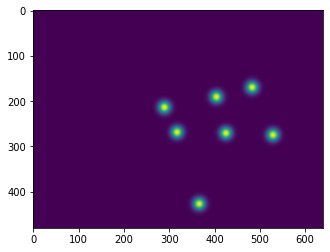

In [19]:
global Gaussian_Matrix

file = 'file0'
Gaussian_Matrix = []

f = open('../coordinate/' + file + '.txt', 'r')

co = f.read().split('\n')[:-1]

for j in co:
    x, y = j.split(',')
    gauss(int(x), int(y))

f.close()

path = '../static/'+ file + '.png'
img = cv2.imread(path, 0)
    
M1M2arr = np.sum(Gaussian_Matrix, axis=0)
cb = plt.imshow(M1M2arr)

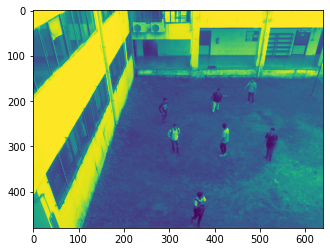

In [16]:
plt.imshow(img)